<a href="https://colab.research.google.com/github/Raulespz/ai_parkinson_detection/blob/main/AI_detect_Parkinson's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### ARTIFICIAL INTELIGENCE TO DETECT PARKINSON DESEASE ###

## THE THREE MAJOR ASPECTS THAT WE HAVE TO TAKE INTO ACCOUNT IS TO DEVELOP AN AI:

      # TRAINING # FOR EXAMPLE WITH from xgboost import XGBClassifier (LIBRARY)
      # VALIDATION # from sklearn.metrics import classification_report
      # PREDICTION # Using from sklearn.model_selection import train_test_split with model <<< predictions = model.predict(x_test) >>>

In [ ]:
# Description: This program detects if an inndividual has Parkinson's disease

In [ ]:
### IMPORT THE LIBRARIES USEFUL TO RUN THE MACHINE LEARNING ###

# Get the independencies that I'm going to use trhough this program
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns


In [ ]:
### LOAD THE DATA SET ###
from google.colab import drive # Use to load data on Google Colab #
df = pd.read_csv('/content/drive/MyDrive/parkinsons.csv')
df.head(100)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,phon_R01_S22_5,157.447,163.267,149.605,0.00369,0.00002,0.00201,0.00197,0.00602,0.03272,0.283,0.01813,0.01909,0.02571,0.05439,0.01018,21.693,1,0.447285,0.705658,-6.247076,0.180528,2.344348,0.164916
96,phon_R01_S22_6,159.116,168.913,144.811,0.00342,0.00002,0.00178,0.00184,0.00535,0.03381,0.307,0.01806,0.02024,0.02809,0.05417,0.00852,22.663,1,0.366329,0.693429,-6.417440,0.194627,2.473239,0.151709
97,phon_R01_S24_1,125.036,143.946,116.187,0.01280,0.00010,0.00743,0.00623,0.02228,0.03886,0.342,0.02135,0.02174,0.03088,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
98,phon_R01_S24_2,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,0.02542,0.02630,0.03908,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### CHECK THIS DATA FOR MISSING VALUES ###
df.isnull().values.any()
# So is false there is not an empty values, there are complete data with full values.

False

In [ ]:
# Get the number of rows and columsn inthe data set
df.shape

(195, 24)

In [ ]:
#Get the count of people that has the desease and people that does not has the desease
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
#The consecuently values are the results of the run cell before, so check it out.

percent_has_disease = 147 / (147+48) * 100
percent_dont_have_disease = 48 / (147+48) * 100

print('If I guess the individual did not have Parkinson disease, I would be correct', percent_dont_have_disease, '% of the time' )
print('If I guess the individual has Parkinson disease, I would be correct', percent_has_disease, '% of the time' )

If I guess the individual did not have Parkinson disease, I would be correct 24.615384615384617 % of the time
If I guess the individual has Parkinson disease, I would be correct 75.38461538461539 % of the time


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


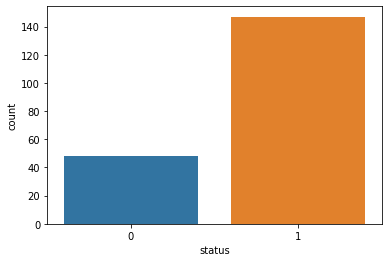

In [ ]:
# So we are getting more accurate the project and not only guessing we have  to be more precisely.

#Visualize the count
sns.countplot(df['status'])

In [ ]:
#Get the data types
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
### SEPARATE THE MATRIX 'X' DATA SET AND THE ARRAY 'Y' OUR TARGET ###
# Create the feature data set

# We are going to erase the variable name becasue not is useful to do the project right now
x = df.drop(['name'], 1)
x = np.array(x.drop(['status'], 1)) # np.array create an array of all the columns of the table eccept for status that is deleted with x.drop, 'status' column, because this corresponde the variable (y)
# x here is taking each row represents an array from each value from 'status' that is the variable that says as the patient has or not Parkinson Disease witht he variable (y).
# 10^2 = E+02
# For example:
# The first array of(x) is: ([[1.199920e+02, 1.573020e+02, 7.499700e+01, ..., 2.664820e-01,
#        2.301442e+00, 2.846540e-01].  that is the first row.
# The first row of (y) is :  1
# Create the target data set

y = np.array(df['status']) #Whit the df is going to take only values from the status.

display (x)
# 10^2 = E+02  to understand the values that are inside the matrix of x matrix.
display (y)
# y is going to display the numbers 1 or 0 that mean values that has or not the desease and is content in status from the database.


array([[1.199920e+02, 1.573020e+02, 7.499700e+01, ..., 2.664820e-01,
        2.301442e+00, 2.846540e-01],
       [1.224000e+02, 1.486500e+02, 1.138190e+02, ..., 3.355900e-01,
        2.486855e+00, 3.686740e-01],
       [1.166820e+02, 1.311110e+02, 1.115550e+02, ..., 3.111730e-01,
        2.342259e+00, 3.326340e-01],
       ...,
       [1.746880e+02, 2.400050e+02, 7.428700e+01, ..., 1.584530e-01,
        2.679772e+00, 1.317280e-01],
       [1.987640e+02, 3.969610e+02, 7.490400e+01, ..., 2.074540e-01,
        2.138608e+00, 1.233060e-01],
       [2.142890e+02, 2.602770e+02, 7.797300e+01, ..., 1.906670e-01,
        2.555477e+00, 1.485690e-01]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
### TO SEPARATE THE DATA FROM WHAT IS GOING TO BE TRAINED AND TESTED ###

## from sklearn.model_selection import train_test_split ##

#Split the data to be into 80% training and 20% testing data set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

In [ ]:
#Transform the data, the feature data values between 0 and 1
sc = MinMaxScaler(feature_range=(0,1))  #To understand what do MinMaxScaler uses this formula to create new values from the matrix of x_train or others:
#  is this = X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
x_train = sc.fit_transform(x_train) #With fit.transform we trasform the data from the feature specified with sc from 0 to 1. #Which one is totally necessary due to the values
# of the matrix are upper 100, 150, etc, so this help to have values among 0 to 1, that are more handable amounts.
print(x_train)
x_test = sc.transform(x_test)

# Only was transformed x_test and x_train due to the values of y_test and y_train are in 0 or 1 because say to us if the patient has or not the disease.

[[0.41180413 0.12484563 0.05964512 ... 0.44432814 0.31244317 0.26005327]
 [0.7173698  0.24870531 0.13938305 ... 0.56319068 0.5016638  0.38933326]
 [0.15260091 0.04993825 0.22233929 ... 0.67475727 0.44307139 0.34101585]
 ...
 [0.40612293 0.12490687 0.47065529 ... 0.45221389 0.40998359 0.18553398]
 [0.64016929 0.23302816 0.57863829 ... 0.74081253 0.82370406 0.77482458]
 [0.76719202 0.24121988 0.76884636 ... 0.40093738 0.48003219 0.19023545]]


In [ ]:
### TRAINING DATA ###
## How to boost our machine learning, we should enhance it employing the large samples posible to the data training ##

#Here we are training the model (((The clf (for classifier) estimator instance is first fitted to the model; that is, it must learn from the model. This is done by passing our training set to the fit method.)))<<<this was extracted from: https://scikit-learn.org/stable/tutorial/basic/tutorial.html>>>
#Create the XGBClassifier
model = XGBClassifier(Sumax_depth=6, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              gamma=0.0, learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=70, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1).fit(x_train, y_train);
print(model)


XGBClassifier(Sumax_depth=6, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              gamma=0.0, learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=70, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)


In [ ]:
### ANOTHER METHOD FOR TRAINING THE DATA WITH GRIDSEARCHCV ###

from sklearn.model_selection import GridSearchCV

clf = XGBClassifier()
grid = GridSearchCV(clf, param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')}, n_jobs=-1, scoring="roc_auc", cv=3)

grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))


Best: 0.925535 using {'C': 1, 'kernel': 'linear'}


In [ ]:
### PREDICTIONS ###

# Get the model predictions
predictions = model.predict(x_test)
predictions

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
model.predict(x_test)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
########## UNTIL HERE THE END OF THE CODE DONE BEFORE #######

In [ ]:
##### VALIDATION #######

#Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(cohen_kappa_score(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(f1_score(y_test, predictions, average='binary'))
print(matthews_corrcoef(y_test, predictions))
print(balanced_accuracy_score(y_test, predictions))
print(roc_auc_score(y_test, predictions))
#  cm = confusion_matrix(y_test, model.predict(x_test)) # show us the true positives, true negatives, FP, FN
#  cm

#  for i in range(len(cm)):

#  TP = cm[0][0]  #[0][0] That tell us the position of the variables e the row 0 a the colum 0 too.
#  FP = cm[0][1]
#  FN = cm[1][0]
#  TN = cm[1][1]

#  total = TP+FP+FN+TN

#  print(cm)
#  print('Testing Accuracy = ', (TP+TN)/(total))
#  print()

[[ 7  1]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.97      1.00      0.98        31

    accuracy                           0.97        39
   macro avg       0.98      0.94      0.96        39
weighted avg       0.98      0.97      0.97        39

0.9175475687103594
0.9743589743589743
0.9841269841269841
0.9206824914160148
0.9375
0.9375


In [ ]:
#### This is another way to choose an specific hyperparameters to us classifier ####

#### VIDEO TUTORIAL : https://www.youtube.com/watch?v=9HomdnM12o4

params = {
    "learning_rate"    :  [ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    "Su"
    "max_depth"        :  [ 3, 4, 5, 6, 8, 10, 12, 15 ],
    "min_child_weight" :  [ 1, 3, 5, 7, 20, 50, 75, 100],
    "gamma"            :  [ 0.0, 0.1, 0.2, 0.3, 0.4, 0.5 ],
    "colsample_bytree" :  [ 0.3, 0.4, 0.5, 0.7],
    "colsample_bylevel":  [ 0.1, 0.3, 0.5, 0.7, 0.9, 1 ],
    "subsample"        :  [ 0.1, 0.3, 0.5, 0.7, 0.9, 1 ],
    "reg_lambda"       :  [ 1, 3, 5, 7],
    "n_estimators"     :  [ 10, 30, 50, 70, 100]
}


In [ ]:
#### This is another way to choose an specific hyperparameters to us classifier ####

#### VIDEO TUTORIAL : https://www.youtube.com/watch?v=9HomdnM12o4

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import xgboost

In [ ]:
#### This is another way to choose an specific hyperparameters to us classifier ####

#### VIDEO TUTORIAL : https://www.youtube.com/watch?v=9HomdnM12o4   ###NAME: Hyperparameter Optimization for Xgboost, CHANNEL: Krish Naik


classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier, param_distributions= params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3, refit=True)

In [ ]:
#### This is another way to choose an specific hyperparameters to us classifier ####

random_search.fit(x_train, y_train)   ## I had problems with the video tutorial, so this helps = https://datascience.stackexchange.com/questions/71767/randomizedsearchcv-object-has-no-attribute-best-estimator
print(random_search.best_estimator_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


XGBClassifier(Sumax_depth=6, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              gamma=0.0, learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=70, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)


[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.3s finished


In [ ]:
#### This is another way to choose an specific hyperparameters to us classifier ####

print(random_search.best_params_)

{'subsample': 0.7, 'reg_lambda': 1, 'n_estimators': 70, 'min_child_weight': 1, 'learning_rate': 0.25, 'gamma': 0.0, 'colsample_bytree': 0.7, 'colsample_bylevel': 1, 'Sumax_depth': 6}


In [ ]:
#### This is another way to choose an specific hyperparameters to us classifier ####

classifier = xgboost.XGBClassifier(Sumax_depth=6, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              gamma=0.0, learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=70, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

#cm = confusion_matrix(y_test, predict(x_test)) # show us the true positives, true negatives, FP, FN


  #TP = cm[0][0]  #[0][0] That tell us the position of the variables e the row 0 a the colum 0 too.
 # FP = cm[0][1]
  #FN = cm[1][0]
  #TN = cm[1][1]

 # total = TP+FP+FN+TN

 # print(cm)
 # print('Testing Accuracy = ', (TP+TN)/(total))
 # print()

array([[ 3,  2],
       [ 0, 34]])

In [ ]:
####
#### THIS IS GOING TO BE FOR INTRODUCE A NEW DATA AND PREDICT ####
####

In [ ]:
#### THIS IS GOING TO BE FOR INTRODUCE A NEW DATA AND PREDICT ####

### LOAD THE DATA SET ###
from google.colab import drive # Use to load data on Google Colab #
df = pd.read_csv('/content/drive/MyDrive/parkinsonsforpredict.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_12378678,160.234,290.302,150.997,0.00984,0.00011,0.0137,0.00954,0.06109,0.07374,0.826,0.05182,0.0613,0.04971,0.10545,0.17211,21.033,1,0.714783,0.846385,-6.983031,0.388482,2.709662,0.294524


In [ ]:
#### THIS IS GOING TO BE FOR INTRODUCE A NEW DATA AND PREDICT ####

xprobe = df.drop(['name'], 1) ## predictprobe this is going to be the 'x' here!, so predictprobe = x
xprobe = np.array(xprobe.drop(['status'], 1)) # np.array create an array of all the columns of the table eccept for status that is deleted with x.drop, 'status' column, because this corresponde the variable (y)
# x here is taking each row represents an array from each value from 'status' that is the variable that says as the patient has or not Parkinson Disease witht he variable (y).
# 10^2 = E+02
# For example:
# The first array of(x) is: ([[1.199920e+02, 1.573020e+02, 7.499700e+01, ..., 2.664820e-01,
#        2.301442e+00, 2.846540e-01].  that is the first row.
# The first row of (y) is :  1
# Create the target data set

yresult = np.array(df['status']) ## yresult this is going to be the 'x' here!, so yresult = y
display (xprobe)
# 10^2 = E+02  to understand the values that are inside the matrix of x matrix.
display (yresult)

array([[ 1.602340e+02,  2.903020e+02,  1.509970e+02,  9.840000e-03,
         1.100000e-04,  1.370000e-02,  9.540000e-03,  6.109000e-02,
         7.374000e-02,  8.260000e-01,  5.182000e-02,  6.130000e-02,
         4.971000e-02,  1.054500e-01,  1.721100e-01,  2.103300e+01,
         7.147830e-01,  8.463850e-01, -6.983031e+00,  3.884820e-01,
         2.709662e+00,  2.945240e-01]])

array([1])

In [ ]:
#### THIS IS GOING TO BE FOR INTRODUCE A NEW DATA AND PREDICT ####

#Transform the data, the feature data values between 0 and 1 for x

scla = MinMaxScaler(feature_range=(0,1))  #To understand what do MinMaxScaler uses this formula to create new values from the matrix of x_train or others:
#  is this = X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
xprobe = scla.fit_transform(xprobe) #With fit.transform we trasform the data from the feature specified with sc from 0 to 1. #Which one is totally necessary due to the values
# of the matrix are upper 100, 150, etc, so this help to have values among 0 to 1, that are more handable amounts.
print(xprobe)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
#### THIS IS GOING TO BE FOR INTRODUCE A NEW DATA AND PREDICT ####

predictions = model.predict(xprobe)
predictions

array([0])

In [ ]:
# Create a function for the models(3) to detect breast cancer
# This is for train the data

def models(x_train, y_train):

# About the Logistic Regresion here is a very good video explanation: https://www.youtube.com/watch?v=yIYKR4sgzI8

  #Logistic Regresion
#  from sklearn.linear_model import LogisticRegression
#  log = LogisticRegression(random_state=0)
#  log.fit(x_train, y_train)    #This is for train this model

# About Decision Tree is to chose from a top of a tree the principal or the root of the varibles that we have and is more reelevant fo the study it means
# that if the values are important and we have a positive value of that has cancer so this variable among (radius_mean,	texture_mean,	perimeter_mean,	area_mean
# that are included in the x varible so this could be the root of it in this case the values that are higher such are related to to cancer because to more huge that
# are the dimentions are highly provided evidence that there is cancer and we could have a positive breast cancer, that variables among the 29 using in the
# main study is going to be the root of the tree. And from the root we chose the secuentiatly of the tree the second group important variable in base of the values of the
# root... continuing doing it until to have the diagnosis if patient has or not the cancer.
# For more information check this video of explanation: https://www.youtube.com/watch?v=7VeUPuFGJHk

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(x_train, y_train)  #This is for train this model


  # Another model Random forest Classifier
#  from sklearn.ensemble import RandomForestClassifier
#  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#  forest.fit(x_train, y_train) #This is for train this model

  #Print the models accuracy on the train data
#  print('[0] Logistic Regression Traininig Accuracy:', log.score (x_train, y_train))
  print('[0] Logistic Regression Traininig Accuracy:', tree.score (x_train, y_train))
#  print('[0] Logistic Regression Traininig Accuracy:', forest.score (x_train, y_train))

  return tree #log, tree, forest

In [ ]:
#Print the prediction of the random forest classifier model
pred = model.predict(y_test)
pred

#The fist array result is the prediction of the model of patients
# that have or not cancer. And the second one array are the second array of
# ptients that actuually has cancer it means  the real data.

# To improve the accuracy of our Machine learning we could tweak(retocar)
# some of the parameters and maybe even test other models as well better
# And as we are dealing with human lives I want that to be as close as possible to 100%.


ValueError: ignored

In [ ]:
#Getting all of the models
model = models(x_train, y_train)
# x_train.shape
# y_train.shape
# print(y_train)

In [ ]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#  print( classification_report(y_test, model.predict(x_test)))
#  print( accuracy_score(y_test, model.predict(x_test)))
#  print()

predictions = model.predict(y_test)
predictions

In [ ]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(x_train, y_train)

clf_svm.predict(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression()
mod.fit(x_train, y_train).predict(x_test)

In [ ]:
# Get the models accuracy, precision, recall and F1 score
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
x_train, y_train = make_multilabel_classification(random_state=0)
inner_clf = LogisticRegression(solver="liblinear", random_state=0)
clf = MultiOutputClassifier(inner_clf).fit(x_train, y_train)
y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(x_train)])
roc_auc_score(y_test, y_score, average=None)

from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV().fit(x_train, y_train)
y_score = clf.decision_function(x_train)
roc_auc_score(y_test, y_score, average=None)

In [ ]:
# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# fit final model
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, predictions))
from sklearn import svm; clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(x_train, y_train)

In [ ]:
# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# fit final model
model = LogisticRegression()
model.fit(x_test, y_test)

In [ ]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(x_train, y_train)

## x_test[0]

## clf_svm.predict(x_test[0])

In [ ]:
from keras.models import load_model

mf = pd.read_csv('/content/drive/MyDrive/parkinsonsforpredict.csv')

test_predict = best_model.predict(mf)

In [ ]:
mf = pd.read_csv('/content/drive/MyDrive/parkinsonsforpredict.csv')
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(x_train, y_train)

clf_svm.predict(x_test)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y=True)

clf.set_params(kernel='linear').fit(test_x, test_y)
SVC(kernel='linear')
clf.predict(X[:5])
array([0, 0, 0, 0, 0])

clf.set_params(kernel='rbf').fit(X, y)
SVC()
clf.predict(X[:5])
array([0, 0, 0, 0, 0])